<a href="https://colab.research.google.com/github/Bimal2002/AIML_LAB/blob/master/Lab4_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def random_permutation(n):
    p = np.arange(n)
    k=n;
    while k>0 :
       U = random.uniform(0,1)
       i = int(k*U)+1
       temp = p[i-1]
       p[i-1] = p[k-1]
       p[k-1] = temp
       k = k-1
    return p

print(random_permutation(10))


# plt.hist(sample, bins=10, density=False)
# plt.show()

[5 3 1 9 2 4 0 6 8 7]


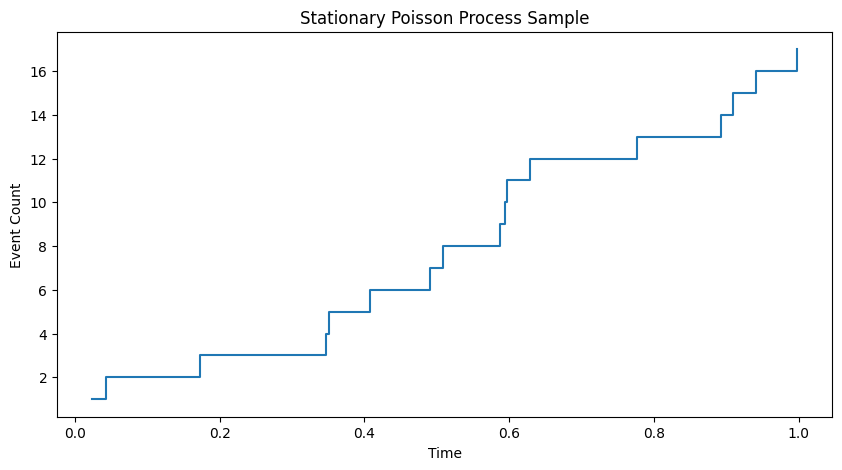

In [ ]:
#2
import numpy as np
import random
import matplotlib.pyplot as plt
def Stationary_Poisson_Process(lamda,T):
    t=0
    i=0
    # U =random.uniform(0,1)
    sample=[]
    while t<T:
        U = random.uniform(0,1)
        t = t-np.log(U)/lamda
        if t<T:
            i = i+1
            sample.append(t)

    return sample


T = 20  # Total time
lamda = 1 # Intensity
sample = Stationary_Poisson_Process(T, lamda)



plt.figure(figsize=(10, 5))
plt.step(sample, np.arange(1, len(sample) + 1), where='post')
plt.xlabel("Time")
plt.ylabel("Event Count")
plt.title("Stationary Poisson Process Sample")
plt.show()


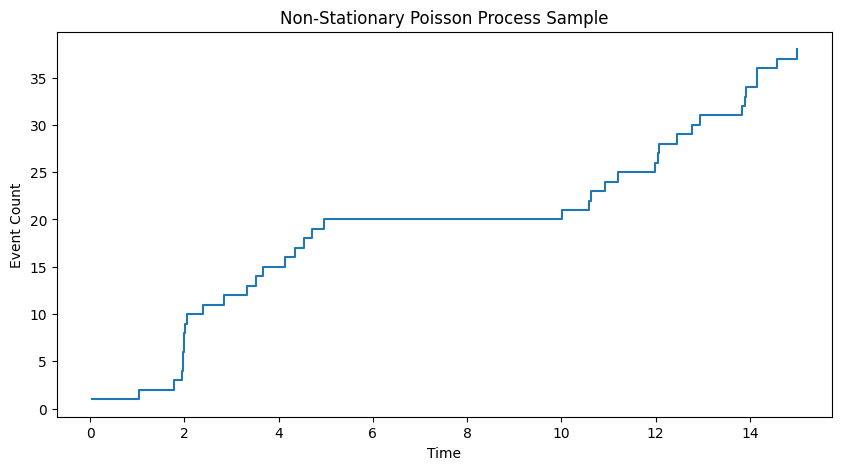

In [ ]:
#3.1
import numpy as np
import matplotlib.pyplot as plt

def lambda_t(t):

    return 2+3 * np.sin(2 * np.pi * t / 10)

def simulate_nhpp(T, lambda_max):

    t = 0
    events = []

    while t < T:
        U1 = np.random.uniform(0, 1)
        t += -np.log(U1) / lambda_max

        if t > T:
            break

        U2 = np.random.uniform(0, 1)
        if U2 <= lambda_t(t) / lambda_max:
            events.append(t)

    return events

T = 15
lambda_max = 8

event_times = simulate_nhpp(T, lambda_max)

plt.figure(figsize=(10, 5))
plt.step(event_times, np.arange(1, len(event_times) + 1), where='post')
plt.xlabel("Time")
plt.ylabel("Event Count")
plt.title("Non-Stationary Poisson Process Sample")
plt.show()


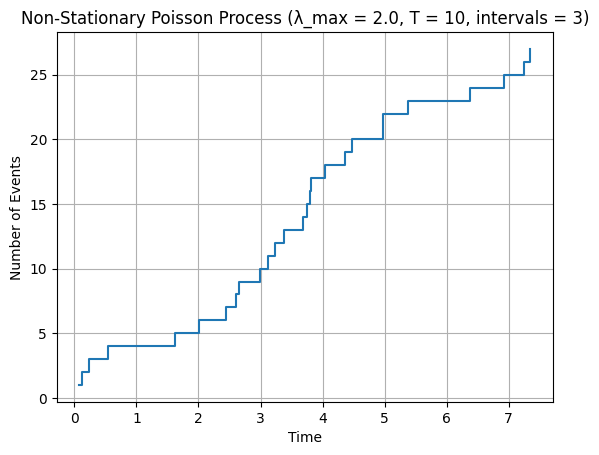

In [ ]:
#3.2
import numpy as np
import matplotlib.pyplot as plt

def intensity_function(j):
    if j < 5:
        return 4
    elif j< 10:
        return 6
    else:
        return 3

def generate_nhpp_piecewise(lambda_max, T, k):
    t = 0
    J = 1
    I = 0
    event_times = []
    interval_length = T / (k + 1)

    while True:
        U = np.random.rand()
        lambda_J = intensity_function(J)
        X = (-1 / lambda_J) * np.log(U)

        while t + X > J * interval_length:
            if J == k + 1:
                break
            X = ((X - (J * interval_length - t)) * lambda_J) / intensity_function(J + 1)
            J += 1
            continue
        if J == k + 1:
            break
        t += X
        U2 = np.random.rand()

        if U2 <= lambda_J / lambda_max:
            I += 1
            event_times.append(t)

    return event_times

lambda_max = 2.0
T = 10
k = 3

event_times = generate_nhpp_piecewise(lambda_max, T, k)

plt.step(event_times, np.arange(1, len(event_times) + 1), where='post')
plt.xlabel('Time')
plt.ylabel('Number of Events')
plt.title(f'Non-Stationary Poisson Process (λ_max = {lambda_max}, T = {T}, intervals = {k})')
plt.grid(True)
plt.show()